# 6.5 Unsupervised Machine Learning

## Content 
1. Importing Libraries and Data 
2. The Elbow Technique
3. k-means Cluster

## Importing Libraries and Data

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [2]:
# Graphs created are displayed in notebook 
%matplotlib inline

In [7]:
#import data
path = r'C:\Users\tlayt\OneDrive\Documents\CF Data Analytics\Acheivement 6\Final Project'

In [8]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'us_births_2016_2021.csv'), index_col = False)


In [9]:
df.head()

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g),Average Birth Weight (lbs)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9,6.871473
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0,6.701940
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0,6.790123
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9,6.882496
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3,6.998016


In [10]:
#creating subgroup
df_sub = df[['Education Level Code', 'Number of Births', 'Average Age of Mother (years)','Average Birth Weight (lbs)']]

In [11]:
df_sub.head()

,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (lbs)
0,1,1052,27.8,6.871473
1,2,3436,24.1,6.701940
2,3,8777,25.4,6.790123
3,4,6453,26.7,6.882496
4,5,2227,28.9,6.998016


In [12]:
#renaming columns 
df_sub.rename(columns = {'Education Level Code' : 'EDU Code', 'Average Age of Mother (years)' : 'Avg Age', 'Average Birth Weight (lbs)':'BW lbs'}, inplace = True)

C:\Users\tlayt\AppData\Local\Temp\ipykernel_19704\1077534729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.rename(columns = {'Education Level Code' : 'EDU Code', 'Average Age of Mother (years)' : 'Avg Age', 'Average Birth Weight (lbs)':'BW lbs'}, inplace = True)


In [13]:
df_sub.head()

,EDU Code,Number of Births,Avg Age,BW lbs
0,1,1052,27.8,6.871473
1,2,3436,24.1,6.701940
2,3,8777,25.4,6.790123
3,4,6453,26.7,6.882496
4,5,2227,28.9,6.998016


## The Elbow Technique

In [14]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [16]:
# Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_sub).score(df_sub) for i in range(len(kmeans))] 

score

C:\Users\tlayt\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tlayt\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tlayt\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tlayt\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tlayt\anaconda3\lib\site-packages\sklearn\clust

[-245717033209.63602,
 -99993710065.27124,
 -37375209624.94194,
 -19554061487.43038,
 -13634617684.079512,
 -9820605993.686264,
 -6534216095.399326,
 -4975806618.544767,
 -4067445060.17707]

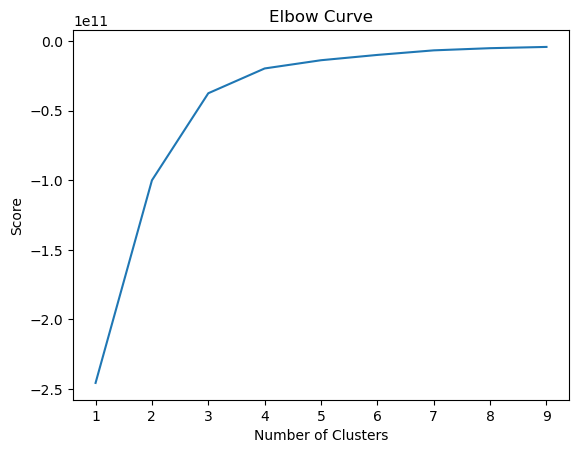

In [17]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()


### Elbow looks to be either 3 or 4. I am going to use 4 as there seems to be a big enought jump frpm 3 to 4 to maybe be significant. 

## K means Clustering

In [19]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 


In [20]:
# Fit the k-means object to the data.

kmeans.fit(df_sub)

C:\Users\tlayt\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [24]:
#defining clusters columns in df
df_sub['clusters'] = kmeans.fit_predict(df_sub)

C:\Users\tlayt\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tlayt\AppData\Local\Temp\ipykernel_19704\2880583671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['clusters'] = kmeans.fit_predict(df_sub)


In [25]:
df_sub.head()

,EDU Code,Number of Births,Avg Age,BW lbs,clusters
0,1,1052,27.8,6.871473,0
1,2,3436,24.1,6.701940,0
2,3,8777,25.4,6.790123,3
3,4,6453,26.7,6.882496,3
4,5,2227,28.9,6.998016,0


df_sub['clusters'].value_counts()

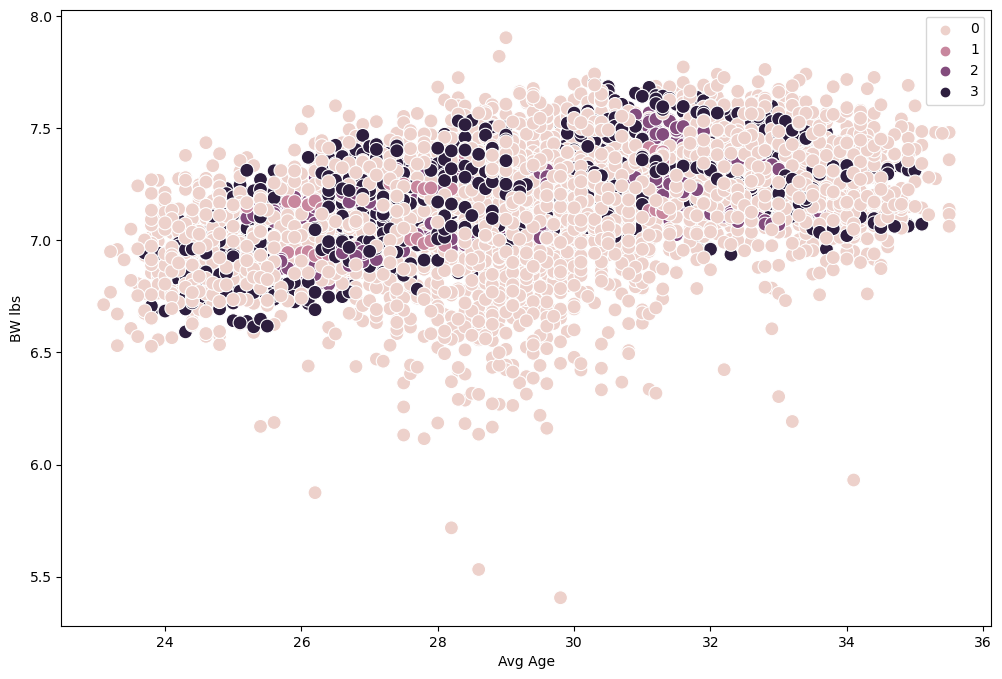

In [28]:
# Plot the clusters for the "Avg Age " and "Birth weight" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['Avg Age'], y=df_sub['BW lbs'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Avg Age')
plt.ylabel('BW lbs') 
plt.show()

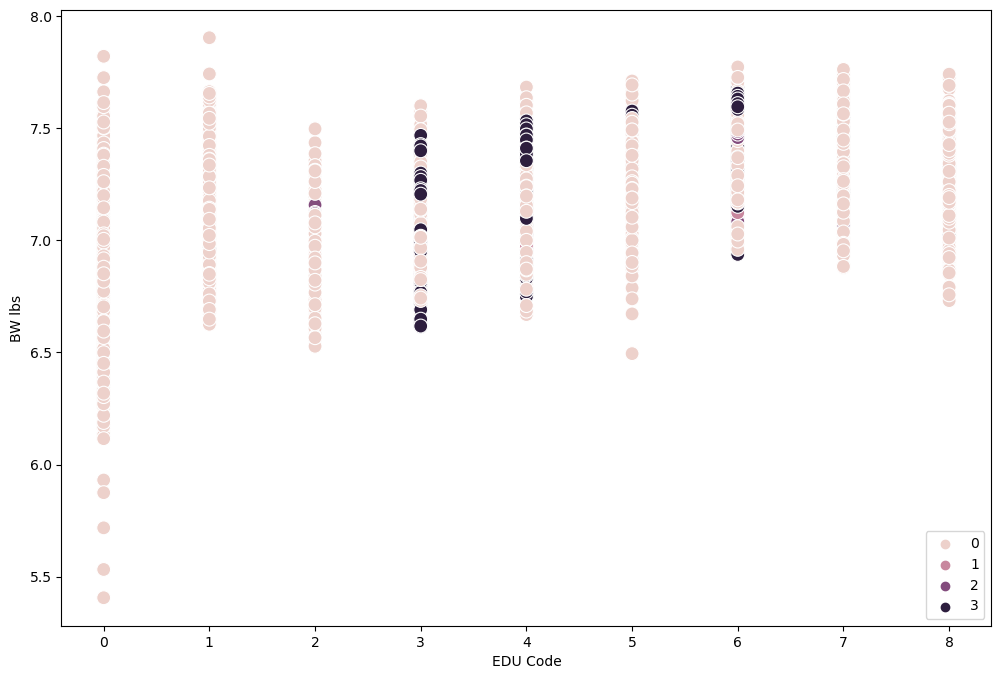

In [29]:
# Plot the clusters for the "EDU Code " and "Birth weight" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['EDU Code'], y=df_sub['BW lbs'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('EDU Code')
plt.ylabel('BW lbs') 
plt.show()

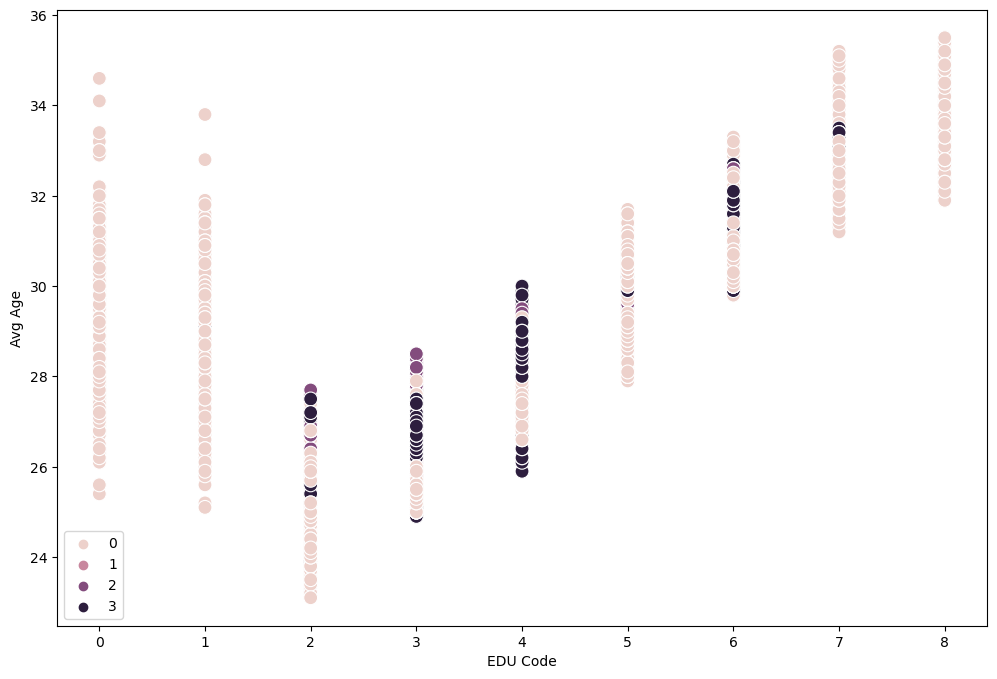

In [30]:
# Plot the clusters for the "EDU Code " and "Average Age" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['EDU Code'], y=df_sub['Avg Age'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('EDU Code')
plt.ylabel('Avg Age') 
plt.show()

I ahve o idea what these clusters could represent! It is really hard to see any change or patterns due to how large the light pink or "0" cluster is. I do not see any distinctive or recognizable, insightful patterns

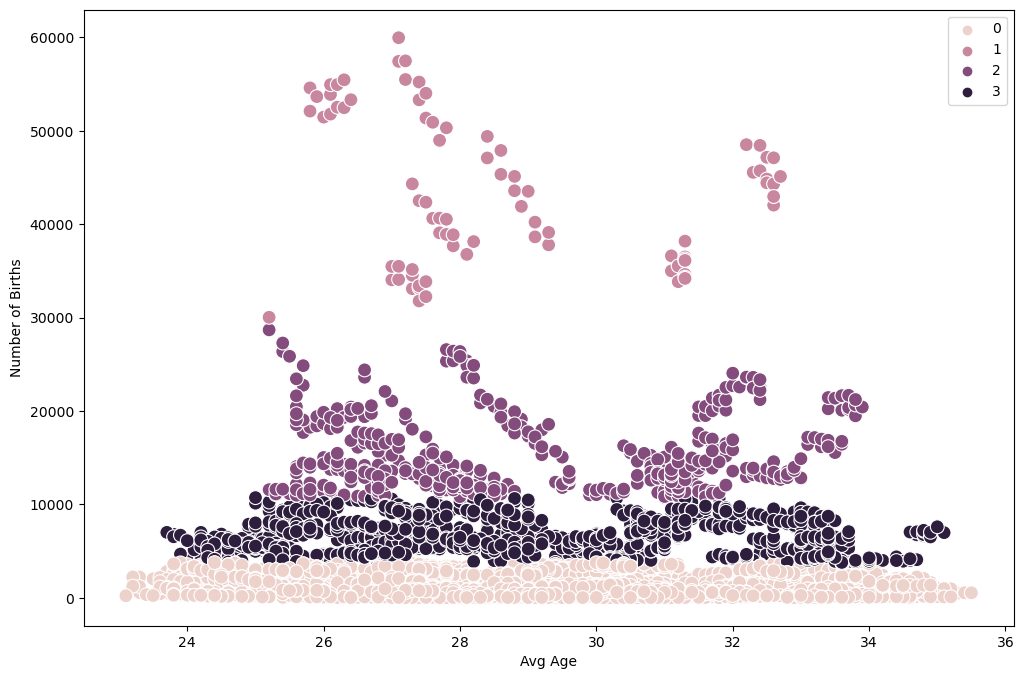

In [31]:
# Plot the clusters for the "number of births " and "Average Age" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['Avg Age'], y=df_sub['Number of Births'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Avg Age')
plt.ylabel('Number of Births') 
plt.show()

I was not seeing any pattern until I made this last graph. I now see that the clusters have a lot oto do with the number of births. 

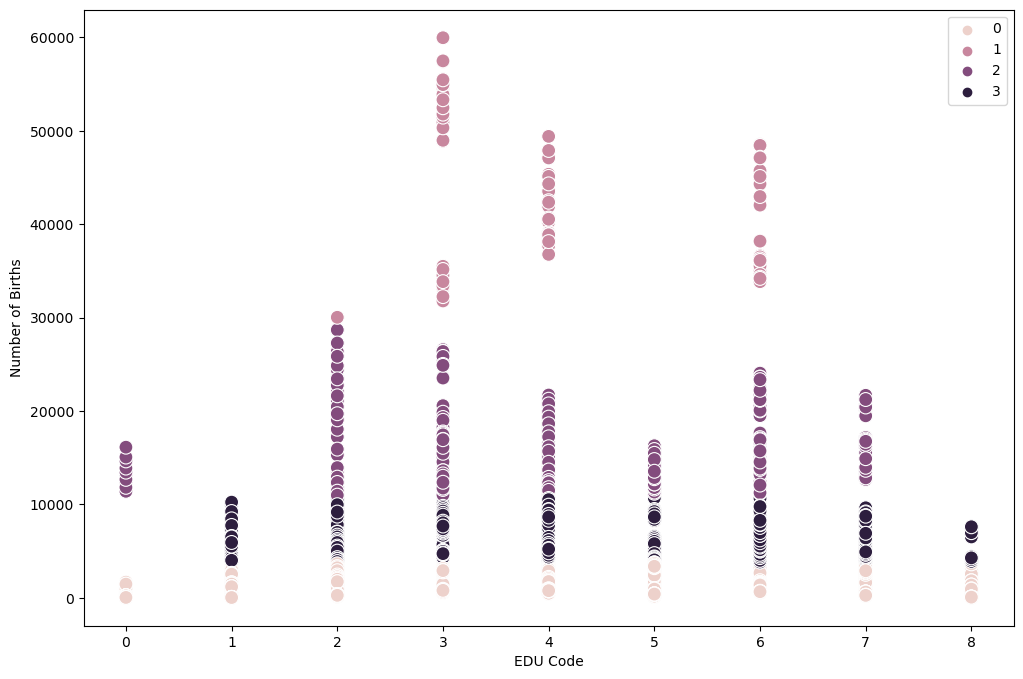

In [33]:
# Plot the clusters for the "number of births " and "EDU Code" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['EDU Code'], y=df_sub['Number of Births'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('EDU Code')
plt.ylabel('Number of Births') 
plt.show()

The clusters have been definied by the number of births per state per year per edu level. 

In [34]:
#creating flags
df_sub.loc[df_sub['clusters'] == 3, 'cluster'] = 'dark purple'
df_sub.loc[df_sub['clusters'] == 2, 'cluster'] = 'purple'
df_sub.loc[df_sub['clusters'] == 1, 'cluster'] = 'pink'
df_sub.loc[df_sub['clusters'] == 0, 'cluster'] = 'light pink'

C:\Users\tlayt\AppData\Local\Temp\ipykernel_19704\3747024355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.loc[df_sub['clusters'] == 3, 'cluster'] = 'dark purple'


In [36]:
#Running descriptive stats
df_sub.groupby('cluster').agg({'EDU Code':['mean', 'median'], 
                         'Number of Births':['mean', 'median'], 
                         'Avg Age':['mean', 'median'],
                          'BW lbs':['mean', 'median']})


EDU Code        Number of Births             Avg Age         \
                 mean median             mean   median       mean median   
cluster                                                                    
dark purple  4.496644    4.0      6368.929530   6070.0  29.049497   29.0   
light pink   3.818858    4.0      1175.113413    904.0  29.787145   29.8   
pink         4.117647    4.0     43466.529412  42965.0  28.694118   27.8   
purple       4.281938    4.0     15215.328194  13838.5  29.085242   28.5   

               BW lbs            
                 mean    median  
cluster                          
dark purple  7.191907  7.197972  
light pink   7.157988  7.174383  
pink         7.176084  7.158951  
purple       7.172941  7.168210

At this point, with the lack in insights these clusters are producing it is indicating I need to do further analysis to explore my data further. 